In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4022

Best Fitness:	701.1053
Solution:	700.0000
Diff:		1.1053

[0:02:37][----------] 1.96% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3992

Best Fitness:	700.8368
Solution:	700.0000
Diff:		0.8368

[0:04:32][----------] 3.92% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3161

Best Fitness:	700.9386
Solution:	700.0000
Diff:		0.9386

[0:06:25][#---------] 5.88% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.5237

Best Fitness:	700.9592
Solution:	700.0000
Diff:		0.9592

[0:08:11][#---------] 7.84% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3924

Best Fitness:	701.0648
Solution:	700.0000
Diff:		1.0648

[0:10:06][#---------] 9.80% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3675

Best Fitness:	701.0568
Solution:	700.0000
Diff:		1.0568

[0:12:13][#---------] 11.76% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4281

Best Fitness:	700.9906
Solution:	700.0000
Diff:		0.9906

[0:14:12][#---------] 13.73% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4537

Best Fitness:	701.0919
Solution:	700.0000
Diff:		1.0919

[0:16:09][##--------] 15.69% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3120

Best Fitness:	700.9682
Solution:	700.0000
Diff:		0.9682

[0:18:10][##--------] 17.65% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3061

Best Fitness:	701.0063
Solution:	700.0000
Diff:		1.0063

[0:20:21][##--------] 19.61% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3348

Best Fitness:	701.0041
Solution:	700.0000
Diff:		1.0041

[0:22:09][##--------] 21.57% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.5216

Best Fitness:	700.9698
Solution:	700.0000
Diff:		0.9698

[0:24:05][##--------] 23.53% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3068

Best Fitness:	700.9754
Solution:	700.0000
Diff:		0.9754

[0:26:04][###-------] 25.49% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.2671

Best Fitness:	701.0343
Solution:	700.0000
Diff:		1.0343

[0:28:04][###-------] 27.45% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3564

Best Fitness:	700.7265
Solution:	700.0000
Diff:		0.7265

[0:30:09][###-------] 29.41% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3799

Best Fitness:	701.1167
Solution:	700.0000
Diff:		1.1167

[0:32:00][###-------] 31.37% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3969

Best Fitness:	701.0939
Solution:	700.0000
Diff:		1.0939

[0:33:45][###-------] 33.33% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.5712

Best Fitness:	701.0835
Solution:	700.0000
Diff:		1.0835

[0:35:39][####------] 35.29% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3392

Best Fitness:	701.0578
Solution:	700.0000
Diff:		1.0578

[0:37:48][####------] 37.25% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4305

Best Fitness:	700.9845
Solution:	700.0000
Diff:		0.9845

[0:39:52][####------] 39.22% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3393

Best Fitness:	700.8859
Solution:	700.0000
Diff:		0.8859

[0:41:27][####------] 41.18% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3638

Best Fitness:	701.0646
Solution:	700.0000
Diff:		1.0646

[0:43:18][####------] 43.14% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.2924

Best Fitness:	700.9826
Solution:	700.0000
Diff:		0.9826

[0:44:56][#####-----] 45.10% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3848

Best Fitness:	701.0190
Solution:	700.0000
Diff:		1.0190

[0:46:41][#####-----] 47.06% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4422

Best Fitness:	701.0360
Solution:	700.0000
Diff:		1.0360

[0:48:22][#####-----] 49.02% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4568

Best Fitness:	700.9191
Solution:	700.0000
Diff:		0.9191

[0:50:04][#####-----] 50.98% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3628

Best Fitness:	701.0149
Solution:	700.0000
Diff:		1.0149

[0:51:38][#####-----] 52.94% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4404

Best Fitness:	701.0713
Solution:	700.0000
Diff:		1.0713

[0:53:04][#####-----] 54.90% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3437

Best Fitness:	701.0351
Solution:	700.0000
Diff:		1.0351

[0:54:38][######----] 56.86% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4209

Best Fitness:	701.1061
Solution:	700.0000
Diff:		1.1061

[0:56:18][######----] 58.82% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.2863

Best Fitness:	701.0457
Solution:	700.0000
Diff:		1.0457

[0:58:04][######----] 60.78% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3445

Best Fitness:	701.0445
Solution:	700.0000
Diff:		1.0445

[0:59:46][######----] 62.75% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3799

Best Fitness:	701.0539
Solution:	700.0000
Diff:		1.0539

[1:01:34][######----] 64.71% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3511

Best Fitness:	700.9189
Solution:	700.0000
Diff:		0.9189

[1:03:15][#######---] 66.67% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4265

Best Fitness:	701.1134
Solution:	700.0000
Diff:		1.1134

[1:04:50][#######---] 68.63% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4441

Best Fitness:	701.1253
Solution:	700.0000
Diff:		1.1253

[1:06:24][#######---] 70.59% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.2559

Best Fitness:	700.8940
Solution:	700.0000
Diff:		0.8940

[1:08:20][#######---] 72.55% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.6135

Best Fitness:	701.1050
Solution:	700.0000
Diff:		1.1050

[1:09:59][#######---] 74.51% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3410

Best Fitness:	701.0328
Solution:	700.0000
Diff:		1.0328

[1:11:45][########--] 76.47% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4140

Best Fitness:	701.0926
Solution:	700.0000
Diff:		1.0926

[1:13:36][########--] 78.43% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4357

Best Fitness:	701.1065
Solution:	700.0000
Diff:		1.1065

[1:15:20][########--] 80.39% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.2704

Best Fitness:	700.9886
Solution:	700.0000
Diff:		0.9886

[1:16:52][########--] 82.35% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4402

Best Fitness:	701.0631
Solution:	700.0000
Diff:		1.0631

[1:18:39][########--] 84.31% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3626

Best Fitness:	701.0902
Solution:	700.0000
Diff:		1.0902

[1:20:25][#########-] 86.27% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3703

Best Fitness:	700.8389
Solution:	700.0000
Diff:		0.8389

[1:22:05][#########-] 88.24% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.5174

Best Fitness:	700.9708
Solution:	700.0000
Diff:		0.9708

[1:23:40][#########-] 90.20% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3098

Best Fitness:	701.0304
Solution:	700.0000
Diff:		1.0304

[1:25:13][#########-] 92.16% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3711

Best Fitness:	701.0782
Solution:	700.0000
Diff:		1.0782

[1:26:55][#########-] 94.12% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.4791

Best Fitness:	700.9254
Solution:	700.0000
Diff:		0.9254

[1:28:36][##########] 96.08% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3512

Best Fitness:	701.0547
Solution:	700.0000
Diff:		1.0547

[1:30:17][##########] 98.04% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	701.3229

Best Fitness:	700.9045
Solution:	700.0000
Diff:		0.9045

[1:32:17][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:32:17

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
60,1.634211,1.301272,1.484020,1.371671,1.445804,1.608150,1.149655,1.632676,2.082923,1.726317,...,1.637862,1.678112,1.591986,1.761087,1.283258,1.626195,1.251713,1.366556,1.343724,50
61,1.605575,1.301272,1.484020,1.371671,1.445804,1.447521,1.149655,1.632676,2.082923,1.563629,...,1.637862,1.476525,1.591986,1.660372,1.283258,1.626195,1.251713,1.366556,1.343724,50
62,1.605575,1.301272,1.484020,1.371671,1.445804,1.447521,1.149655,1.632676,1.510014,1.563629,...,1.637862,1.476525,1.517487,1.477399,1.283258,1.626195,1.251713,1.361255,1.343724,50
63,1.302695,1.252306,1.484020,1.371671,1.445804,1.447521,1.149655,1.272811,1.417059,1.563629,...,1.510959,1.167194,1.334752,1.477399,1.283258,1.348210,1.251713,1.361255,1.343724,50
64,1.302695,1.252306,1.353936,1.371671,1.445804,1.447521,1.149655,1.272811,1.417059,1.380117,...,1.510959,1.167194,1.334752,1.413178,1.283258,1.348210,1.251713,1.361255,1.343724,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1.1052793945386838

Best error for run 1: 0.8367616330631336

Best error for run 2: 0.9386026975042796

Best error for run 3: 0.9591573676734697

Best error for run 4: 1.0648277212612811

Best error for run 5: 1.0568107816804968

Best error for run 6: 0.9906358534499304

Best error for run 7: 1.091917806119568

Best error for run 8: 0.9681984203692764

Best error for run 9: 1.0062978803970282

Best error for run 10: 1.0041047008306805

Best error for run 11: 0.9697643796067723

Best error for run 12: 0.9754366560853214

Best error for run 13: 1.034263628371491

Best error for run 14: 0.726495030531396

Best error for run 15: 1.1166531892873763

Best error for run 16: 1.09389966004494

Best error for run 17: 1.0835496407376013

Best error for run 18: 1.0578371472300887

Best error for run 19: 0.984525572090547

Best error for run 20: 0.8858512070141842

Best error for run 21: 1.0645851589760014

Best error for run 22: 0.9825786522507087

Best error for run 23: 1.0189503736148708

Best error for run 24: 1.035990418487927

Best error for run 25: 0.9191024217091126

Best error for run 26: 1.0148964166736505

Best error for run 27: 1.0712701584003526

Best error for run 28: 1.0350968383550025

Best error for run 29: 1.1061128631673682

Best error for run 30: 1.0456982035267401

Best error for run 31: 1.0444863082288975

Best error for run 32: 1.0539149202681983

Best error for run 33: 0.9188568933219585

Best error for run 34: 1.1133932622136626

Best error for run 35: 1.1252603174717706

Best error for run 36: 0.8940183725605948

Best error for run 37: 1.1050493023202534

Best error for run 38: 1.0328313393672488

Best error for run 39: 1.0926477681791766

Best error for run 40: 1.106459969094999

Best error for run 41: 0.988639919858997

Best error for run 42: 1.0630662260617783

Best error for run 43: 1.0902229884476355

Best error for run 44: 0.8389014646251098

Best error for run 45: 0.9708073258602781

Best error for run 46: 1.030352902350046

Best error for run 47: 1.0781793406840734

Best error for run 48: 0.9254297485395

Best error for run 49: 1.0546515973611577

Best error for run 50: 0.9044770566695206

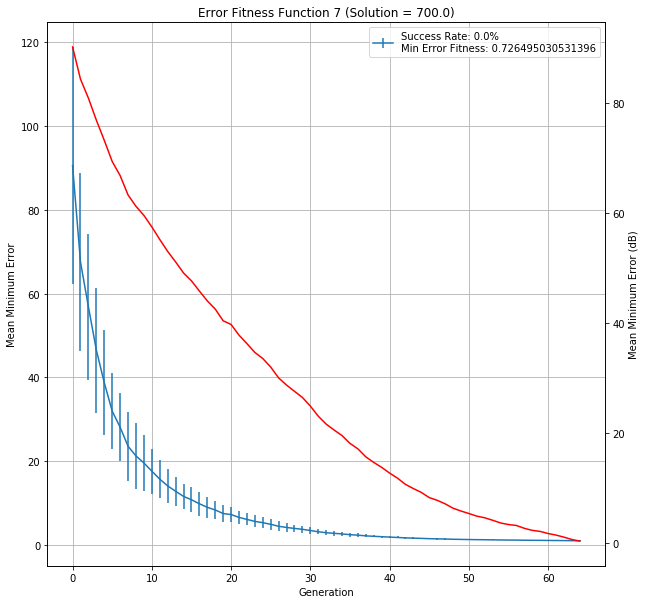

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.2,1.105279,0.836762,0.938603,0.959157,1.064828,1.056811,...,0.838901,0.970807,1.030353,1.078179,0.92543,1.054652,0.904477,1.013271,1:32:17,20100
